<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/AI_Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving with Misplaced Tiles Heuristic...
Solution found using Misplaced Tiles:
- Number of moves: 2
- Nodes explored: 3

Visualizing the solution for Misplaced Tiles...



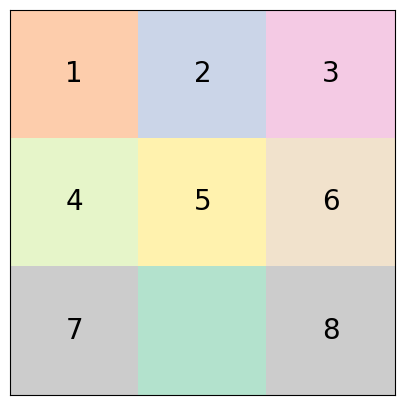

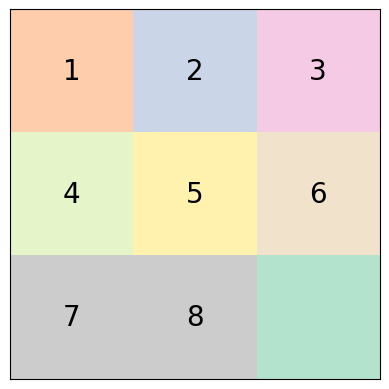

<Figure size 640x480 with 0 Axes>

Solving with Manhattan Distance Heuristic...
Solution found using Manhattan Distance:
- Number of moves: 2
- Nodes explored: 3

Visualizing the solution for Manhattan Distance...



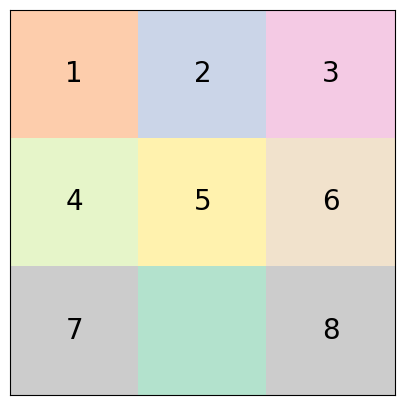

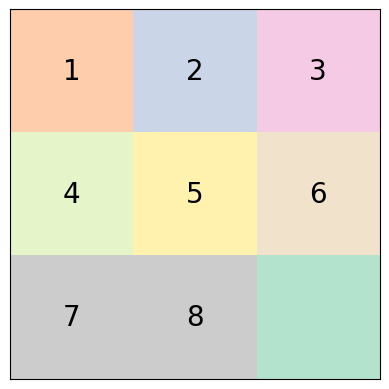

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

class PuzzleState:
    def __init__(self, board, parent=None, move="", cost=0, heuristic=0):
        self.board = board
        self.parent = parent
        self.move = move
        self.cost = cost
        self.heuristic = heuristic
        self.total_cost = cost + heuristic

    def __lt__(self, other):
        return self.total_cost < other.total_cost

def get_goal_state():
    return np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

def is_goal(state):
    return np.array_equal(state.board, get_goal_state())

def manhattan_distance(state):
    goal = get_goal_state()
    distance = sum(abs(np.argwhere(state.board == i)[0] - np.argwhere(goal == i)[0]).sum() for i in range(1, 9))
    return distance

def misplaced_tiles(state):
    goal = get_goal_state()
    return np.sum(state.board != goal) - 1

def get_neighbors(state):
    neighbors = []
    board = state.board
    x, y = np.argwhere(board == 0)[0]
    moves = [(x-1, y, "Up"), (x+1, y, "Down"), (x, y-1, "Left"), (x, y+1, "Right")]

    for nx, ny, move in moves:
        if 0 <= nx < 3 and 0 <= ny < 3:
            new_board = board.copy()
            new_board[x, y], new_board[nx, ny] = new_board[nx, ny], new_board[x, y]
            neighbors.append(PuzzleState(new_board, state, move, state.cost + 1))
    return neighbors

def a_star(initial_board, heuristic_func):
    initial_state = PuzzleState(initial_board, heuristic=heuristic_func(PuzzleState(initial_board)))
    open_list = []
    heapq.heappush(open_list, initial_state)
    explored = set()
    nodes_explored = 0

    while open_list:
        current_state = heapq.heappop(open_list)
        nodes_explored += 1

        if is_goal(current_state):
            return current_state, nodes_explored

        explored.add(current_state.board.tobytes())

        for neighbor in get_neighbors(current_state):
            if neighbor.board.tobytes() not in explored:
                neighbor.heuristic = heuristic_func(neighbor)
                neighbor.total_cost = neighbor.cost + neighbor.heuristic
                heapq.heappush(open_list, neighbor)

    return None, nodes_explored

def extract_solution(state):
    solution = []
    while state.parent:
        solution.append(state)
        state = state.parent
    return solution[::-1]

def visualize_puzzle(state):
    plt.imshow(state.board, cmap='Pastel2', interpolation='none')
    for i in range(3):
        for j in range(3):
            if state.board[i, j] != 0:
                plt.text(j, i, str(state.board[i, j]), ha='center', va='center', fontsize=20, color='black')
    plt.xticks([])
    plt.yticks([])
    plt.pause(0.5)
    plt.clf()

def show_solution_path(solution):
    plt.figure(figsize=(5, 5))
    for state in solution:
        visualize_puzzle(state)
    plt.show()

def solve_and_visualize(initial_board, heuristic_func, heuristic_name):
    print(f"Solving with {heuristic_name} Heuristic...")
    solution, nodes = a_star(initial_board, heuristic_func)
    moves = extract_solution(solution)
    print(f"Solution found using {heuristic_name}:")
    print(f"- Number of moves: {len(moves)}")
    print(f"- Nodes explored: {nodes}\n")
    print(f"Visualizing the solution for {heuristic_name}...\n")
    show_solution_path(moves)

if __name__ == "__main__":
    initial_board = np.array([[1, 2, 3], [4, 0, 6], [7, 5, 8]])

    solve_and_visualize(initial_board, misplaced_tiles, "Misplaced Tiles")
    solve_and_visualize(initial_board, manhattan_distance, "Manhattan Distance")
